In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.pyplot import boxplot, show
import seaborn as sns
import pylab as pl
from scipy.stats import norm

In [2]:
df=pd.read_csv('cumulative.csv')
df

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,8,10872983,K00756.03,Kepler-228 b,CONFIRMED,CANDIDATE,0.992,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
8,9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
9,10,10910878,K00757.01,Kepler-229 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-83.0,4.485,0.083,-0.028,0.848,0.033,-0.072,286.99948,48.375790,15.841


In [4]:
#there are 5 categorical columns
#using the fillna function, with method ffill to fill missing data with previous row values
df[["kepoi_name","kepler_name","koi_disposition","koi_pdisposition","koi_tce_delivname"]]=df[["kepoi_name","kepler_name","koi_disposition","koi_pdisposition","koi_tce_delivname"]].fillna(method='ffill')

In [5]:
#to fill the first row elements with value 0 as the entire row is empty
df['koi_teq_err1']=df['koi_teq_err1'].fillna(value=0,limit=1)
df['koi_teq_err2']=df['koi_teq_err2'].fillna(value=0,limit=1)

In [6]:
#iterate through all the columns
#if the column is numeric
#fill missing values with mean of that column
for cname in df.columns[0:]:
    if(is_numeric_dtype(df[cname])):
        df[cname]=df[cname].fillna(value=df[cname].mean())

In [7]:
#checking if the missing values have been replaced
df.iloc[1488]

rowid                           1489
kepid                        9411166
kepoi_name                 K01922.02
kepler_name            Kepler-1016 b
koi_disposition            CANDIDATE
koi_pdisposition           CANDIDATE
koi_score                   0.480829
koi_fpflag_nt                      0
koi_fpflag_ss                      0
koi_fpflag_co                      0
koi_fpflag_ec                      0
koi_period                   15.0952
koi_period_err1           0.00214786
koi_period_err2          -0.00214786
koi_time0bk                  139.474
koi_time0bk_err1          0.00993256
koi_time0bk_err2         -0.00993256
koi_impact                  0.735105
koi_impact_err1              1.95986
koi_impact_err2            -0.332557
koi_duration                    3.41
koi_duration_err1           0.339942
koi_duration_err2          -0.339942
koi_depth                    23791.3
koi_depth_err1               123.198
koi_depth_err2              -123.198
koi_prad                     102.892
k

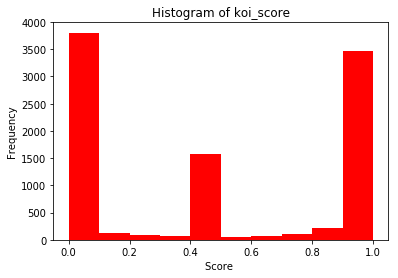

In [8]:
#histogram of koi_score
n_bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
bin_heights, bins, patches = plt.hist(df["koi_score"], n_bins, facecolor='red')
pl.title("Histogram of koi_score")
pl.xlabel("Score ")
pl.ylabel("Frequency")
plt.show()
#most of the scores have extreme values - between 0-0.1 and 0.9-1 
#a few values lie in the middle - between 0.4 and 0.5
#very few values lie in the 0.1-0.4 and 0.5-0.9 range

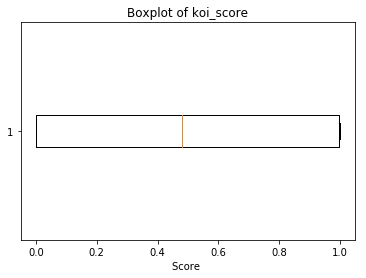

C:\Users\Anagha molkalmur\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


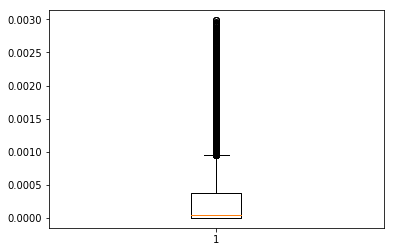

In [18]:
#boxplot of koi_score
#to check for outliers
axes=plt.boxplot(df["koi_score"],vert=False)
pl.title("Boxplot of koi_score")
pl.xlabel("Score ")
plt.show()
#no outliEers are present
#no whiskers present
#hence lower and upper quartile is 0 and 1 respectively
#no values before 0 and after 1
#all values are in the range 0 to 1
data_mean, data_std=np.mean(df.koi_period_err1),np.std(df.koi_period_err1)
cut_off=data_std*3
lower,upper=data_mean-cut_off,data_mean+cut_off
outliers=(x for x in df.koi_period_err1 if x<lower or x>upper)
median=df['koi_period_err1'].median()
mean=df['koi_period_err1'].mean()
for index, row in df.koi_period_err1.iteritems():
    if(row>upper or row<lower):
        df.koi_period_err1.loc[index]= np.mean(df.koi_period_err1)
plt.boxplot(df.koi_period_err1)
plt.show()

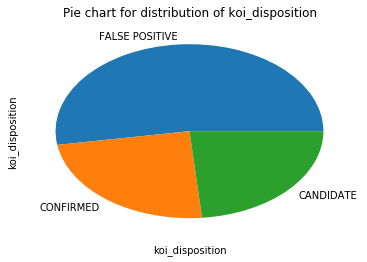

In [10]:
df["koi_disposition"].value_counts().plot(kind="pie")
plt.xlabel('koi_disposition')
plt.title('Pie chart for distribution of koi_disposition')
plt.show()

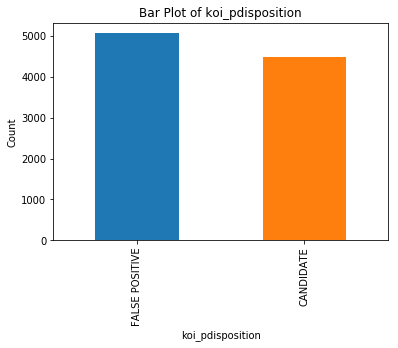

In [11]:
df["koi_pdisposition"].value_counts().plot(kind="bar")
plt.xlabel('koi_pdisposition')
plt.ylabel('Count')
plt.title('Bar Plot of koi_pdisposition')
plt.show()

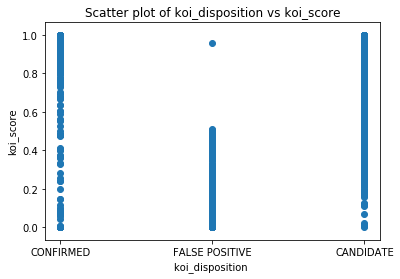

In [12]:
plt.scatter(df["koi_disposition"],df["koi_score"])
plt.xlabel('koi_disposition ')
plt.ylabel('koi_score')
plt.title('Scatter plot of koi_disposition vs koi_score')
plt.show()
#shows the distribution of koi_score according to koi_disposition

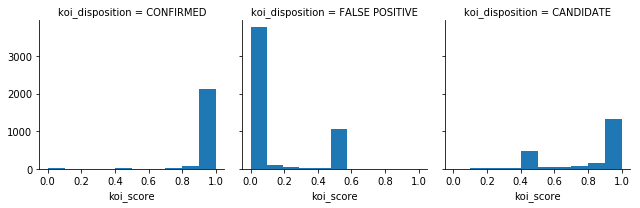

In [13]:
#histogram of koi_score according to koi_disposition values
grid = sns.FacetGrid(df, col='koi_disposition')
grid.map(plt.hist, 'koi_score')
plt.show()

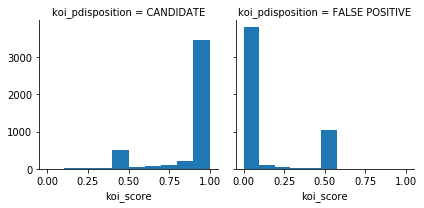

In [14]:
#histogram of koi_score according to koi_pdisposition values
grid = sns.FacetGrid(df, col='koi_pdisposition')
grid.map(plt.hist, 'koi_score')
plt.show()

In [15]:
#to get correlation between all columns
df.corr()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,1.000000,0.021448,-0.427716,0.316824,0.150513,0.037656,0.071214,0.003508,0.185915,-0.185915,...,-0.216665,-0.151253,0.141982,-0.161805,0.064911,0.099514,-0.064141,0.042384,0.018023,-0.105092
kepid,0.021448,1.000000,0.087421,-0.034676,-0.048675,-0.099944,-0.044470,0.011511,0.011336,-0.011336,...,0.003045,0.051274,-0.026020,-0.023479,-0.026661,-0.027154,0.024084,-0.002288,0.993587,0.017521
koi_score,-0.427716,0.087421,1.000000,-0.270261,-0.559839,-0.498053,-0.384224,-0.004200,-0.054121,0.054121,...,0.315365,0.136824,-0.152166,0.168197,-0.069885,-0.103322,0.073717,-0.155436,0.087169,0.038291
koi_fpflag_nt,0.316824,-0.034676,-0.270261,1.000000,-0.253562,-0.020810,0.027112,0.032428,0.335044,-0.335044,...,-0.145806,-0.113721,0.059096,-0.160433,0.032688,0.082383,-0.041075,0.006800,-0.038695,-0.103801
koi_fpflag_ss,0.150513,-0.048675,-0.559839,-0.253562,1.000000,0.149733,0.100001,-0.020984,-0.133177,0.133177,...,-0.168681,-0.049270,0.112459,-0.043913,0.031623,0.035663,-0.030547,0.085946,-0.047653,0.020886
koi_fpflag_co,0.037656,-0.099944,-0.498053,-0.020810,0.149733,1.000000,0.525684,-0.020441,-0.087339,0.087339,...,-0.109312,-0.010748,-0.016061,-0.046239,0.036509,0.028784,-0.027761,0.156078,-0.098131,0.064337
koi_fpflag_ec,0.071214,-0.044470,-0.384224,0.027112,0.100001,0.525684,1.000000,-0.017021,-0.081007,0.081007,...,-0.076591,0.002178,-0.005448,-0.035774,0.019164,0.026370,-0.009926,0.070002,-0.045339,0.038449
koi_period,0.003508,0.011511,-0.004200,0.032428,-0.020984,-0.020441,-0.017021,1.000000,0.053160,-0.053160,...,0.003193,0.001876,-0.006464,-0.003179,-0.000993,-0.000435,0.001555,0.005670,0.011479,-0.009858
koi_period_err1,0.185915,0.011336,-0.054121,0.335044,-0.133177,-0.087339,-0.081007,0.053160,1.000000,-1.000000,...,-0.058312,-0.006212,0.005067,-0.184897,0.005357,0.031255,-0.001938,-0.031279,0.009160,-0.025190
koi_period_err2,-0.185915,-0.011336,0.054121,-0.335044,0.133177,0.087339,0.081007,-0.053160,-1.000000,1.000000,...,0.058312,0.006212,-0.005067,0.184897,-0.005357,-0.031255,0.001938,0.031279,-0.009160,0.025190


In [16]:
#to get correlation between columns in ascending order
df.corr().unstack().sort_values(ascending=True).drop_duplicates()

koi_time0bk_err2   koi_time0bk_err1    -1.000000
koi_prad_err2      koi_prad            -0.987628
koi_insol_err2     koi_insol           -0.966618
koi_srad           koi_srad_err2       -0.873506
koi_insol_err1     koi_insol_err2      -0.853800
koi_steff_err1     koi_steff_err2      -0.824304
koi_impact_err2    koi_impact          -0.800548
koi_prad_err2      koi_prad_err1       -0.660690
koi_srad_err1      koi_srad_err2       -0.653038
koi_srad           koi_slogg           -0.639253
koi_slogg          koi_srad_err1       -0.626153
koi_prad_err1      koi_impact_err2     -0.623382
koi_steff          koi_steff_err2      -0.607080
koi_impact         koi_prad_err2       -0.606893
koi_impact_err2    koi_prad            -0.576263
koi_fpflag_ss      koi_score           -0.559839
koi_duration_err2  koi_period_err1     -0.543492
koi_time0bk_err1   koi_duration_err2   -0.543208
koi_teq            koi_slogg           -0.527374
koi_insol_err2     koi_srad            -0.517466
koi_time0bk_err1   k

In [17]:
df['koi_period_err1'].corr(df['koi_period_err2'])
#strong correlation

-1.0

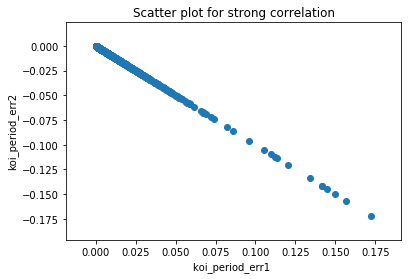

In [18]:
plt.scatter(df["koi_period_err1"],df["koi_period_err2"])
plt.xlabel('koi_period_err1 ')
plt.ylabel('koi_period_err2')
plt.title('Scatter plot for strong correlation')
plt.show()

In [19]:
df['koi_period_err1'].corr(df['koi_depth_err1'])
#weak correlation

0.007793862205375913

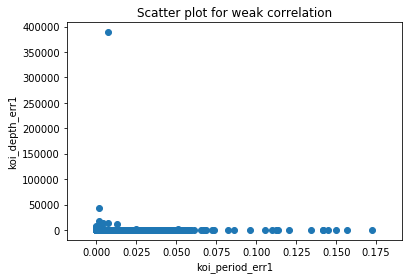

In [20]:
plt.scatter(df["koi_period_err1"],df["koi_depth_err1"])
plt.xlabel('koi_period_err1')
plt.ylabel('koi_depth_err1')
plt.title('Scatter plot for weak correlation')
plt.show()%%!

In [21]:
#Hypothesis testing for koi_score
meanpopulation=df["koi_score"].mean() #population mean
sample=df.sample(2500)
meansample=sample["koi_score"].mean() #sample mean
sdsample=sample["koi_score"].std() #sample standard deviation
z=(meansample-meanpopulation) / (sdsample/50) #calculating z score
p=norm.cdf(z) #calculating p value

In [23]:
print("Sample mean is ",meansample)
print("Sample standard deviation is ",sdsample)
print("Population mean is",meanpopulation)
print("Null hypothesis is mean equal to ",meanpopulation)
print("Alternate hypothesis is mean not equal to ",meanpopulation)
print("z value is ",z)
print("p value is ",p)
print("p>0.05, hence null hypothesis and alternate hypothesis are both plausible")

Sample mean is  0.48643366903402313
Sample standard deviation is  0.439609183887734
Population mean is 0.48082940153960946
Null hypothesis is mean equal to  0.48082940153960946
Alternate hypothesis is mean not equal to  0.48082940153960946
z value is  0.6374147424368724
p value is  0.7380726359610497
p>0.05, hence null hypothesis and alternate hypothesis are both plausible
